In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from random import sample, shuffle
from skimage.feature import hog
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# load labeled faces in wild dataset
lfw_people = fetch_olivetti_faces()

In [3]:
num_classes = 20

# create mask for samples
m = lfw_people.target < num_classes

In [4]:
labels = lfw_people.target[m]
images = lfw_people.images[m, ...]
num_images = len(labels)

In [5]:
# choose a random subset of images
subcount = 5
ex_ixs = sorted(sample(range(num_images), k=subcount))
print(ex_ixs)

[2, 112, 113, 150, 193]


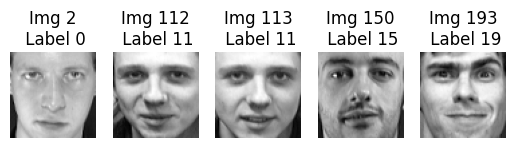

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=subcount)
for ax_no, image_no in enumerate(ex_ixs):
    ax[ax_no].imshow(images[image_no], cmap='gray')
    ax[ax_no].axis("off")
    ax[ax_no].set_title(f"Img {image_no}\n Label {labels[image_no]}")

In [7]:
# extract features from raw data

# eg 1: luminance hist
lumhist_data = []
num_bins = 25

for i in range(num_images):
    # normalized histogram, with input data values ranging 0-1
    hist, _ = np.histogram(images[i], bins=num_bins, range=(0,1), density=True)
    lumhist_data.append(hist)
lumhist_data = np.array(lumhist_data)

print(lumhist_data.shape)
print(len(labels))

(200, 25)
200


In [8]:
# X indicates data, and y indicates labels
# reserve 20% of data for test set. Labels should be either completely in train or completely in test
X_train, X_test, y_train, y_test = train_test_split(lumhist_data,labels,test_size = 0.2, stratify = labels, random_state=0)

# train KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)
print(f"Overall test accuracy: {accuracy}")

Overall test accuracy: 0.85
